In [1]:
import numpy as np
_ = np.seterr(all='raise')

In [2]:
def f(x):  # задаем ур-е f(x) = 0
    m = 1
    a = 1
    U = 10
    h = 1
    try:
        return 1/np.tan(np.sqrt(2*m*(a**2)*U*(1-x)/(h**2))) - np.sqrt(1/x - 1)
    except FloatingPointError as e:
        print(e, "x =", x)

def df(x):  # его производная (для других методов)
    m = 1
    a = 1
    U = 1
    h = 1
    A =  2*m*(a**2)*U/(h**2)
    try:
        return (A /(np.sin(np.sqrt(A-A*x)))**2 / (2 * np.sqrt(A-A*x))) + 1/(2*x*np.sqrt(x-x**2))
    except FloatingPointError as e:
        print(e, "x =", x)

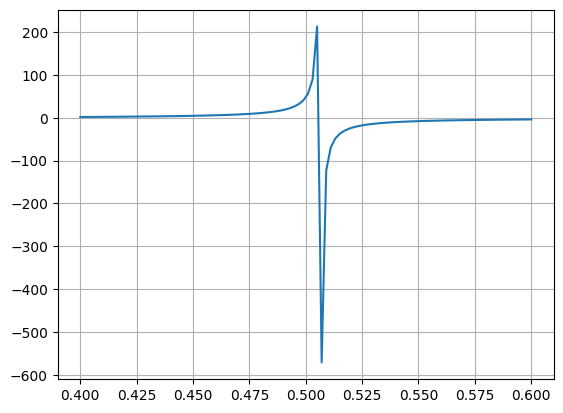

In [3]:
import matplotlib.pyplot as plt  # строим графики
a = 0.4
b = 0.6
x = np.linspace(a, b, 100)
y = [f(xi) for xi in x]
plt.grid(True)
plt.plot(x, y)

In [4]:
# алгоритм деления отрезка
def dichotomy_simple(f, a, b, e = 0.001):
    i = 1
    while b - a > e:
        if f(a) * f((a + b) / 2) <= 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        i += 1
    return a, b, i


# более эффективный алгоритм (вычисляем f(x) не 2 а 1 раз за цикл)
def dichotomy_efficient(f, a, b, e = 0.001):
    i = 1
    f_a = f(a)
    while b - a > e:
        m = (a + b) / 2
        f_m = f(m)
        if f_a * f_m <= 0:
            b = m
        else:
            a = m
            f_a = f_m
        i += 1
    return a, b, i

In [5]:
e = np.finfo(float).eps
a = 0.5
b = 1

print("N =", np.log2((b-a)/e))  #  'предксказываем' сколько итераций проработает алгоритм

# ответ между 1-м и 2-м числом. 3-е число - количество итераций
print(*dichotomy_simple(f, a, b, e))
print(*dichotomy_efficient(f, a, b, e))

N = 51.0
0.5065197799455319 0.5065197799455321 52
0.5065197799455319 0.5065197799455321 52


In [6]:
# Решил сравнить время выполнения обычного и эффективного алгоритмов
# (по заданию необязательно)
import time
time_simple = 0
time_efficient = 0
N = 5000
for i in range(N):
    now = time.time()
    a1, b1, i1 = dichotomy_simple(f, a, b, e)
    time_simple += time.time() - now

    now = time.time()
    a2, b2, i2 = dichotomy_efficient(f, a, b, e)
    time_efficient += time.time() - now

print("simple", time_simple / N)
print("efficient", time_efficient / N)
print("time_efficient / time_simple", time_efficient / time_simple)

simple 0.000672590446472168
efficient 0.00036608824729919434
time_efficient / time_simple 0.54429593702881


invalid value encountered in sqrt x = -3.3046185905235315


TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'

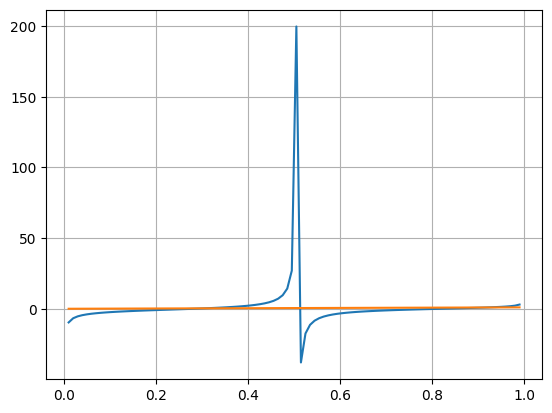

In [7]:
# алгоритм 'простых итераций'
def phi(x):
        return f(x) + x
a = 0.01
b = 0.99
x = np.linspace(a, b, 100)
y = [phi(xi) for xi in x]
plt.grid(True)
plt.plot(x, y)
plt.plot(x, x)  
    
def simple_iterations(phi, x0, e = 0.001):
    i = 1
    while True:
        x = phi(x0)
        prev_x = x0
        x0 = x
        i += 1
        if np.abs(x - prev_x) < e:
            break
    return x0, i

print(simple_iterations(phi, 0.6))

In [ ]:
# алгоритм Ньютона
def newton(f, df, x0, e = 0.001):
    i = 1
    while True:
        x = x0 - f(x)/df(x)
        prev_x = x0
        x0 = x
        i += 1
        if np.abs(x - prev_x) < e:
            break
        return x, i

print(simple_iterations(phi, 0.8))